In [1]:
import igraph as ig
import numpy as np
import matplotlib.pyplot as plt

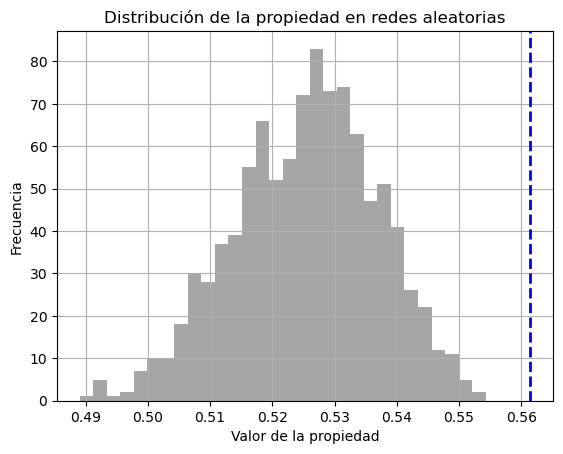

Distancia desde la expectativa: 3.1331382019858762


In [29]:
# Función para generar redes aleatorias mediante intercambio de bordes
def generate_shuffled_networks(graph, num_shuffles):
    shuffled_networks = []
    for _ in range(num_shuffles):
        shuffled_network = graph.copy()
        prob = 0.1
        shuffled_network.rewire_edges(prob)
        shuffled_networks.append(shuffled_network)
    return shuffled_networks

# Función para calcular una propiedad específica de la red
def calculate_property(graph, property_function):
    return property_function(graph)

# Función para estimar la distribución de una propiedad en las redes aleatorias generadas
def estimate_distribution(property_values):
    return np.mean(property_values), np.std(property_values)

# Función para calcular la distancia desde la expectativa del valor observado
def calculate_distance(observed_value, expected_mean, expected_std):
    return abs(observed_value - expected_mean) / expected_std

# Creamos un grafo bipartito de ejemplo
graph = ig.Graph.Famous('Zachary')
graph = ig.read("toy-user-un.gml")

# Paso 2: Generar un conjunto grande de redes aleatorias intercambiando bordes
num_shuffles = 1000
shuffled_networks = generate_shuffled_networks(graph, num_shuffles)

# Paso 3: Calcular la propiedad de interés en la red observada y en las redes generadas
# Define la función que calcula la propiedad de interés (por ejemplo, la transitividad)
def calculate_transitivity(graph):
    return graph.transitivity_undirected()

observed_transitivity = calculate_property(graph, calculate_transitivity)
shuffled_transitivities = [calculate_property(g, calculate_transitivity) for g in shuffled_networks]

# Paso 4: Estimar la distribución de la propiedad en las redes aleatorias y calcular la distancia desde la expectativa
expected_mean, expected_std = estimate_distribution(shuffled_transitivities)
distance_from_expectation = calculate_distance(observed_transitivity, expected_mean, expected_std)

# Gráfica del histograma
plt.hist(shuffled_transitivities, bins=30, color='grey', alpha=0.7)
plt.axvline(x=observed_transitivity, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Valor de la propiedad')
plt.ylabel('Frecuencia')
plt.title('Distribución de la propiedad en redes aleatorias')
plt.grid(True)
plt.show()

print("Distancia desde la expectativa:", distance_from_expectation)


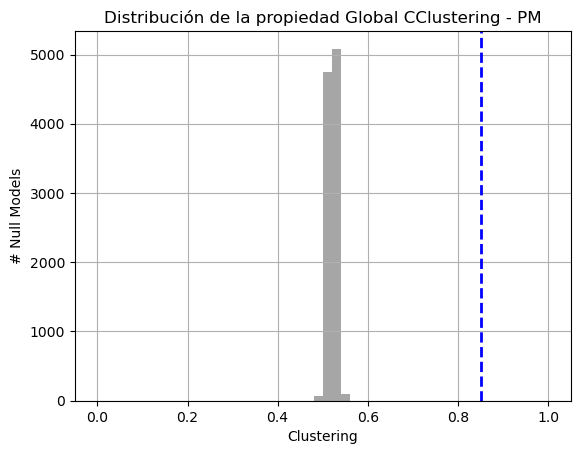

Distancia desde la expectativa: 40.17624637378253


In [17]:
# Función para generar redes aleatorias mediante intercambio de bordes
def generate_shuffled_networks(graph, num_shuffles):
    shuffled_networks = []
    for _ in range(num_shuffles):
        shuffled_network = graph.copy()
        prob = 0.1
        shuffled_network.rewire_edges(prob)
        shuffled_networks.append(shuffled_network)
    return shuffled_networks

# Función para calcular una propiedad específica de la red
def calculate_property(graph, property_function):
    return property_function(graph)

# Función para estimar la distribución de una propiedad en las redes aleatorias generadas
def estimate_distribution(property_values):
    return np.mean(property_values), np.std(property_values)

# Función para calcular la distancia desde la expectativa del valor observado
def calculate_distance(observed_value, expected_mean, expected_std):
    return abs(observed_value - expected_mean) / expected_std

# Creamos un grafo bipartito de ejemplo
#graph = ig.Graph.Famous('Zachary')
dataset = "PM"
graph = ig.read("../data/"+dataset+"/binet-"+dataset+"-Ex.gml")
graph, _ = graph.bipartite_projection()

# Paso 2: Generar un conjunto grande de redes aleatorias intercambiando bordes
num_shuffles = 10000
shuffled_networks = generate_shuffled_networks(graph, num_shuffles)

# Paso 3: Calcular la propiedad de interés en la red observada y en las redes generadas
# Define la función que calcula la propiedad de interés (por ejemplo, la transitividad)
def calculate_tg(graph):
    return graph.transitivity_undirected()
    
def calculate_tl(graph):
    return np.mean(graph.transitivity_local_undirected())
    
def calculate_avglocal(graph):
    return graph.transitivity_avglocal_undirected()

observed_transitivity = calculate_property(graph, calculate_tg)
shuffled_transitivities = [calculate_property(g, calculate_tg) for g in shuffled_networks]

# Paso 4: Estimar la distribución de la propiedad en las redes aleatorias y calcular la distancia desde la expectativa
expected_mean, expected_std = estimate_distribution(shuffled_transitivities)
distance_from_expectation = calculate_distance(observed_transitivity, expected_mean, expected_std)

# Gráfica del histograma
plt.hist(shuffled_transitivities, bins=50, color='grey', alpha=0.7, range=(0,1))
plt.axvline(x=observed_transitivity, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Clustering')
plt.ylabel('# Null Models')
plt.title('Distribución de la propiedad Global CClustering - '+dataset)
plt.grid(True)
plt.show()

print("Distancia desde la expectativa:", distance_from_expectation)


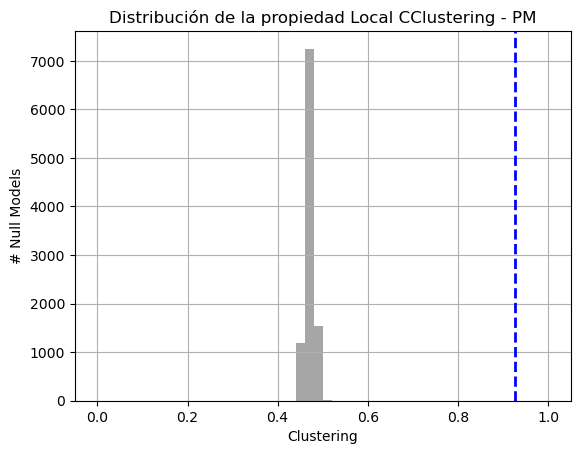

Distancia desde la expectativa: 50.21426667728007


In [19]:

observed_transitivity = calculate_property(graph, calculate_avglocal)
shuffled_transitivities = [calculate_property(g, calculate_avglocal) for g in shuffled_networks]

# Paso 4: Estimar la distribución de la propiedad en las redes aleatorias y calcular la distancia desde la expectativa
expected_mean, expected_std = estimate_distribution(shuffled_transitivities)
distance_from_expectation = calculate_distance(observed_transitivity, expected_mean, expected_std)

# Gráfica del histograma
plt.hist(shuffled_transitivities, bins=50, color='grey', alpha=0.7, range=(0,1))
plt.axvline(x=observed_transitivity, color='blue', linestyle='dashed', linewidth=2)
plt.xlabel('Clustering')
plt.ylabel('# Null Models')
plt.title('Distribución de la propiedad Local CClustering - '+dataset)
plt.grid(True)
plt.show()

print("Distancia desde la expectativa:", distance_from_expectation)

In [ ]:
# Hacer lo que hice pero con los 5 ejemplos midiendo solamente ell coeficiente clusteriong en el grafo bpasico.
# Se tienen un problema porque no se está midiedo el weighted.
# Entonces primero se hace la reduco+on de aristas y despues a validaco+pm ára mp abprdar e rpblema de peso.
# Queda pendiente el enfoque de EGMP